### Data Visualization by Paola VdW

In [1]:
#Include this line to make plots interactive
%matplotlib inline
# or use: %matplotlib notebook

In [2]:
# Import Dependencies
import numpy as np		
import matplotlib.pyplot as plt	
import pandas as pd 	
import scipy.stats as st
#A Python library not shown in class 
#####################
import seaborn as sns
#####################
from pathlib import Path
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify
import psycopg2 

In [3]:
# Read CSV
indicator_prices = pd.read_csv("indicator-prices.csv")

# View CSV
indicator_prices.head()

,months,ICO composite indicator,Colombian Milds,Other Milds,Brazilian Naturals,Robustas
0,01/1990,1.385210,1.811700,1.678146,1.553201,1.092053
1,02/1990,1.479249,2.020971,1.853201,1.712804,1.105077
2,03/1990,1.661148,2.279029,2.091170,1.902208,1.230905
3,04/1990,1.663135,2.247020,2.090728,1.930464,1.235099
4,05/1990,1.618102,2.188521,2.052318,1.905298,1.183664


### Data cleaning

In [4]:
#Information about df (count & Dtype)
indicator_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   months                   348 non-null    object 
 1   ICO composite indicator  348 non-null    float64
 2   Colombian Milds          348 non-null    float64
 3   Other Milds              348 non-null    float64
 4   Brazilian Naturals       348 non-null    float64
 5   Robustas                 348 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.4+ KB


In [5]:
# find number of missing values in each column
indicator_prices.isnull().sum()

months                     0
ICO composite indicator    0
Colombian Milds            0
Other Milds                0
Brazilian Naturals         0
Robustas                   0
dtype: int64

In [6]:
#Get column headers names
indicator_prices.columns

Index(['months', 'ICO composite indicator', 'Colombian Milds', 'Other Milds',
       'Brazilian Naturals', 'Robustas'],
      dtype='object')

In [7]:
#Rename columns for context
indicator_prices = indicator_prices.rename(columns={'months':'Month/Year','ICO composite indicator':'ICO Composite Indicator Price (USD)',
                                        'Colombian Milds':'Colombian Milds (USD)','Other Milds':'Other Milds (USD)',
                                        'Brazilian Naturals':'Brazilian Naturals (USD)','Robustas':'Robustas (USD)'})
indicator_prices.head()

,Month/Year,ICO Composite Indicator Price (USD),Colombian Milds (USD),Other Milds (USD),Brazilian Naturals (USD),Robustas (USD)
0,01/1990,1.385210,1.811700,1.678146,1.553201,1.092053
1,02/1990,1.479249,2.020971,1.853201,1.712804,1.105077
2,03/1990,1.661148,2.279029,2.091170,1.902208,1.230905
3,04/1990,1.663135,2.247020,2.090728,1.930464,1.235099
4,05/1990,1.618102,2.188521,2.052318,1.905298,1.183664


In [8]:
#Statistical analysis of df
indicator_prices.describe()

,ICO Composite Indicator Price (USD),Colombian Milds (USD),Other Milds (USD),Brazilian Naturals (USD),Robustas (USD)
count,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2.312250,3.010300,2.857114,2.516710,1.641917
std,0.912843,1.212479,1.156133,1.054611,0.648173
min,0.908830,1.240177,1.168433,0.852759,0.503532
25%,1.527925,2.036921,1.896082,1.686534,1.091667
50%,2.336424,2.886203,2.753422,2.429029,1.696578
75%,2.851049,3.633223,3.481291,3.020088,2.075717
max,5.104636,7.030905,6.625166,6.035320,4.034879


In [9]:
#Filter 1990s dataset
indicator_prices_1990s = indicator_prices.head(120)
indicator_prices_1990s.tail()

,Month/Year,ICO Composite Indicator Price (USD),Colombian Milds (USD),Other Milds (USD),Brazilian Naturals (USD),Robustas (USD)
115,08/1999,1.704636,2.324062,2.016777,1.692494,1.392274
116,09/1999,1.588079,2.158278,1.861148,1.554746,1.315011
117,10/1999,1.685651,2.288962,2.079470,1.738190,1.291832
118,11/1999,1.947461,2.798234,2.502870,2.172406,1.392053
119,12/1999,2.110817,3.098234,2.747461,2.416556,1.474393


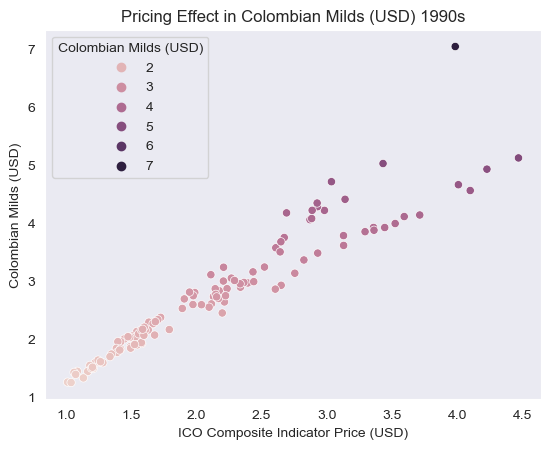

In [10]:
#Data visualization (scatter plot) showing pricing effect between ICO Composite Indicator Price & Colombian Milds in the 90s (USD)
sns.set_style('dark')
sns.scatterplot(x='ICO Composite Indicator Price (USD)', y='Colombian Milds (USD)', data=indicator_prices_1990s, hue='Colombian Milds (USD)', legend='brief').set(title='Pricing Effect in Colombian Milds (USD) 1990s')
plt.savefig('static/images/Colombian_Milds_1990s.png')

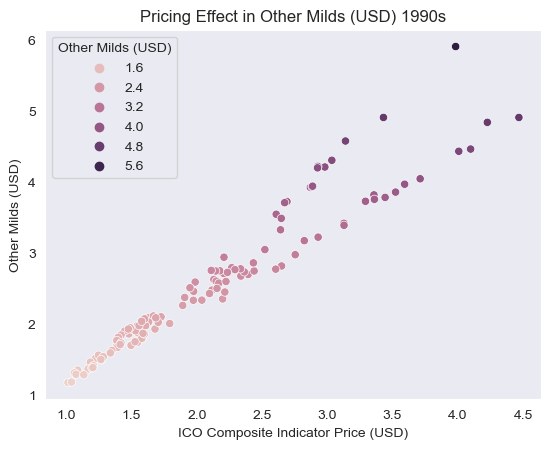

In [11]:
#Data visualization (scatter plot) showing pricing effect between ICO Composite Indicator Price & Other Milds in the 90s (USD)
sns.set_style('dark')
sns.scatterplot(x='ICO Composite Indicator Price (USD)', y='Other Milds (USD)', data=indicator_prices_1990s, hue='Other Milds (USD)', legend='brief').set(title='Pricing Effect in Other Milds (USD) 1990s')
plt.savefig('static/images/Other_Milds_1990s.png')

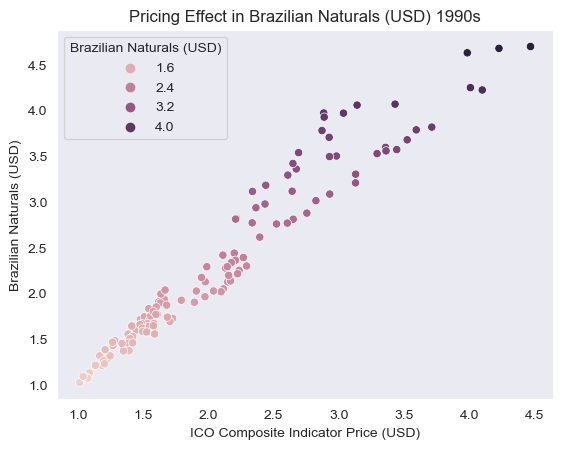

In [12]:
#Data visualization (scatter plot) showing pricing effect between ICO Composite Indicator Price & Brazilian Naturals in the 90s (USD)
sns.set_style('dark')
sns.scatterplot(x='ICO Composite Indicator Price (USD)', y='Brazilian Naturals (USD)', data=indicator_prices_1990s, hue='Brazilian Naturals (USD)', legend='brief').set(title='Pricing Effect in Brazilian Naturals (USD) 1990s')
plt.savefig('static/images/Brazilian_Naturals_1990s.png')

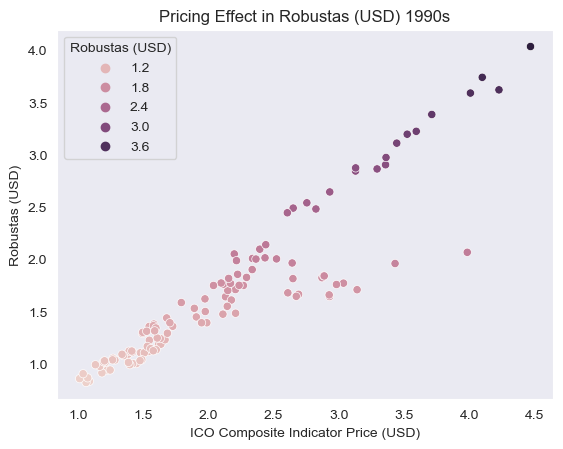

In [13]:
#Data visualization (scatter plot) showing pricing effect between ICO Composite Indicator Price & Robustas in the 90s (USD)
sns.set_style('dark')
sns.scatterplot(x='ICO Composite Indicator Price (USD)', y='Robustas (USD)', data=indicator_prices_1990s, hue='Robustas (USD)', legend='brief').set(title='Pricing Effect in Robustas (USD) 1990s')
plt.savefig('static/images/Robustas_1990s.png')

In [14]:
#Filter 2010s dataset
indicator_prices_2010s = indicator_prices.tail(132)
indicator_prices_2010s.head()

,Month/Year,ICO Composite Indicator Price (USD),Colombian Milds (USD),Other Milds (USD),Brazilian Naturals (USD),Robustas (USD)
216,01/2008,2.700442,3.149227,3.087417,2.824062,2.190066
217,02/2008,3.064459,3.529801,3.472185,3.173951,2.548565
218,03/2008,3.005960,3.347461,3.308830,3.011258,2.691391
219,04/2008,2.793598,3.135541,3.105960,2.818322,2.456733
220,05/2008,2.798234,3.169978,3.133554,2.859161,2.403532


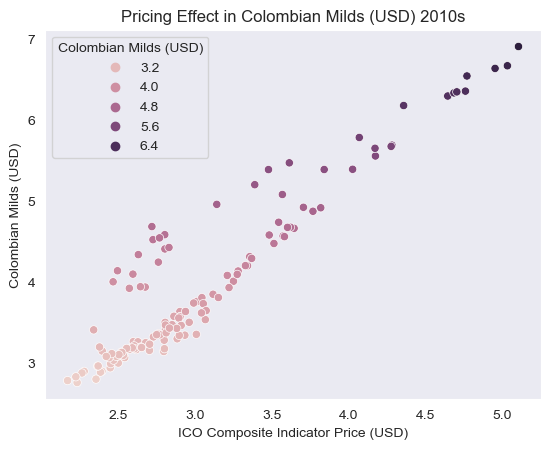

In [15]:
#Data visualization (scatter plot) showing pricing effect between ICO Composite Indicator Price & Colombian Milds in between 2010-2018 (USD)
sns.set_style('dark')
sns.scatterplot(x='ICO Composite Indicator Price (USD)', y='Colombian Milds (USD)', data=indicator_prices_2010s, hue='Colombian Milds (USD)', legend='brief').set(title='Pricing Effect in Colombian Milds (USD) 2010s')
plt.savefig('static/images/Colombian_Milds_2010s.png')

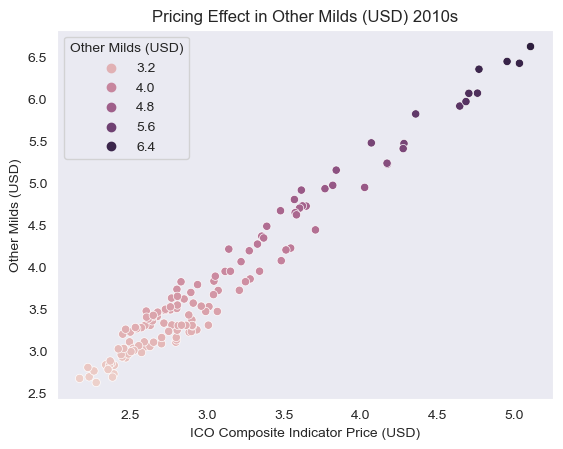

In [16]:
#Data visualization (scatter plot) showing pricing effect between ICO Composite Indicator Price & Other Milds in between 2010-2018 (USD)
sns.set_style('dark')
sns.scatterplot(x='ICO Composite Indicator Price (USD)', y='Other Milds (USD)', data=indicator_prices_2010s, hue='Other Milds (USD)', legend='brief').set(title='Pricing Effect in Other Milds (USD) 2010s')
plt.savefig('static/images/Other_Milds_2010s.png')

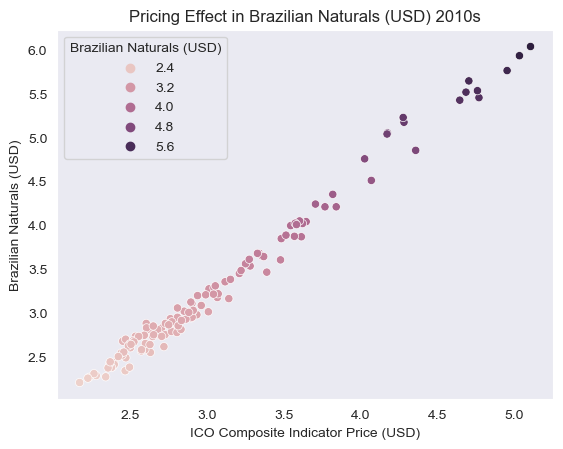

In [17]:
#Data visualization (scatter plot) showing pricing effect between ICO Composite Indicator Price & Brazilian Naturals in between 2010-2018 (USD)
sns.set_style('dark')
sns.scatterplot(x='ICO Composite Indicator Price (USD)', y='Brazilian Naturals (USD)', data=indicator_prices_2010s, hue='Brazilian Naturals (USD)', legend='brief').set(title='Pricing Effect in Brazilian Naturals (USD) 2010s')
plt.savefig('static/images/Brazilian_Naturals_2010s.png')

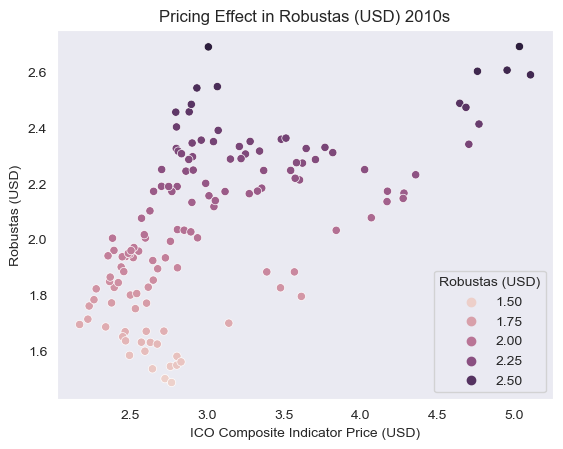

In [18]:
#Data visualization (scatter plot) showing pricing effect between ICO Composite Indicator Price & Robustas in between 2010-2018 (USD)
sns.set_style('dark')
sns.scatterplot(x='ICO Composite Indicator Price (USD)', y='Robustas (USD)', data=indicator_prices_2010s, hue='Robustas (USD)', legend='brief').set(title='Pricing Effect in Robustas (USD) 2010s')
plt.savefig('static/images/Robustas_2010s.png')

In [19]:
#################################################
# Database Setup
#################################################

# Declare a Base using `automap_base()` to access database
Base = automap_base()

# MySQL database connection credentials
db_username = "postgres"
db_password = "postgres"
db_host = "localhost"
db_port = "5432"
db_name = "Project3-DB"

# Construct the MySQL connection string
engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')


In [20]:
# Sample query to shows connection to the database
query = "SELECT * FROM indicator_prices"
# Load data into a pandas DataFrame by reading the SQL database
df = pd.read_sql(query, engine)
# Display the DataFrame
print(df)

      months  ico_composite_indicator  colombian_milds  other_milds  \
0    01/1990                 1.385210         1.811700     1.678146   
1    02/1990                 1.479249         2.020971     1.853201   
2    03/1990                 1.661148         2.279029     2.091170   
3    04/1990                 1.663135         2.247020     2.090728   
4    05/1990                 1.618102         2.188521     2.052318   
..       ...                      ...              ...          ...   
343  08/2018                 2.260706         2.869536     2.764018   
344  09/2018                 2.167108         2.775717     2.675055   
345  10/2018                 2.454967         3.108830     3.031788   
346  11/2018                 2.419205         3.074393     3.026711   
347  12/2018                 2.220971         2.822517     2.805740   

     brazilian_naturals  robustas  
0              1.553201  1.092053  
1              1.712804  1.105077  
2              1.902208  1.230905  
3  

In [21]:
# Sample query to shows connection to the database
query = "SELECT * FROM imports"
# Load data into a pandas DataFrame by reading the SQL database
df_imports = pd.read_sql(query, engine)
# Display the DataFrame
print(df_imports)

                   imports         1990         1991         1992  \
0                  Austria  1880.000000  2058.000000  2206.000000   
1                  Belgium          NaN          NaN          NaN   
2       Belgium/Luxembourg  2015.000000  1746.000000  1828.000000   
3                 Bulgaria   268.000000   200.000000   182.000000   
4                  Croatia          NaN          NaN   168.000000   
..                     ...          ...          ...          ...   
142          South America   668.199002   748.614998   950.163006   
143              Argentina   508.360998   577.463999   697.761000   
144                  Chile   115.640002   133.958001   203.930001   
145               Suriname     1.937000     7.002000     2.928004   
146                Uruguay    42.261001    30.190998    45.544001   

            1993         1994         1995         1996         1997  \
0    1836.000000  1417.000000  1231.000000  1210.000000  1294.000000   
1            NaN          N

In [23]:
# Sample query to shows connection to the database
query = "SELECT * FROM re_exports"
# Load data into a pandas DataFrame by reading the SQL database
df_re_exports = pd.read_sql(query, engine)
# Display the DataFrame
print(df_re_exports)

             re_exports     1990         1991         1992         1993  \
0                Africa   46.617    48.941001    64.146668    52.390666   
1               Algeria   19.345     0.000000     0.000000     0.000000   
2              Botswana    0.261     0.253000     0.313000     0.047000   
3          Burkina Faso    0.066     0.000000     0.000000     0.000000   
4            Cape Verde    0.000     0.000000     0.000000     0.300000   
..                  ...      ...          ...          ...          ...   
129              Norway    8.000     4.000000     3.000000     3.000000   
130  Russian Federation      NaN          NaN     5.000000     0.000000   
131         Switzerland  166.000   151.000000   155.000000   166.000000   
132             Tunisia    0.000     0.000000     0.000000     0.000000   
133                 USA  825.000  1010.000000  1377.000000  1720.000000   

            1994         1995      1996         1997         1998  ...  \
0      71.022001    82.61